Análisis probabilístico de comportamiento de clientes
Total clientes analizados: 10,000
Compras promedio por cliente/año: 2.51
Valor promedio de compra: $122.82

DISTRIBUCIÓN DE COMPRAS ANUALES
-----------------------------------
compras_anuales
0     803
1    2088
2    2497
3    2197
4    1317
5     677
6     280
7      95
8      32
9       9
Name: count, dtype: int64

Probabilidades (usando distribución de Poisson λ=2.51):
P(0 compras/año): 0.0816
P(1 compra/año): 0.2045
P(5+ compras/año): 0.1096

ANÁLISIS DE VALOR DE COMPRA
------------------------------
Media: $122.82
Mediana: $89.13
Desviación estándar: $116.85
Test de normalidad (p-valor): 0.0000
¿Es normal?: No

TEOREMA DEL LÍMITE CENTRAL
------------------------------
Media de medias muestrales: $309.30
Media poblacional real: $306.16
Error estándar de medias: $55.80
Intervalo de confianza 95%: ($199.93, $418.67)
Margen de error: $109.37

Visualizaciones guardadas como 'distribuciones_probabilidad_clientes.png'


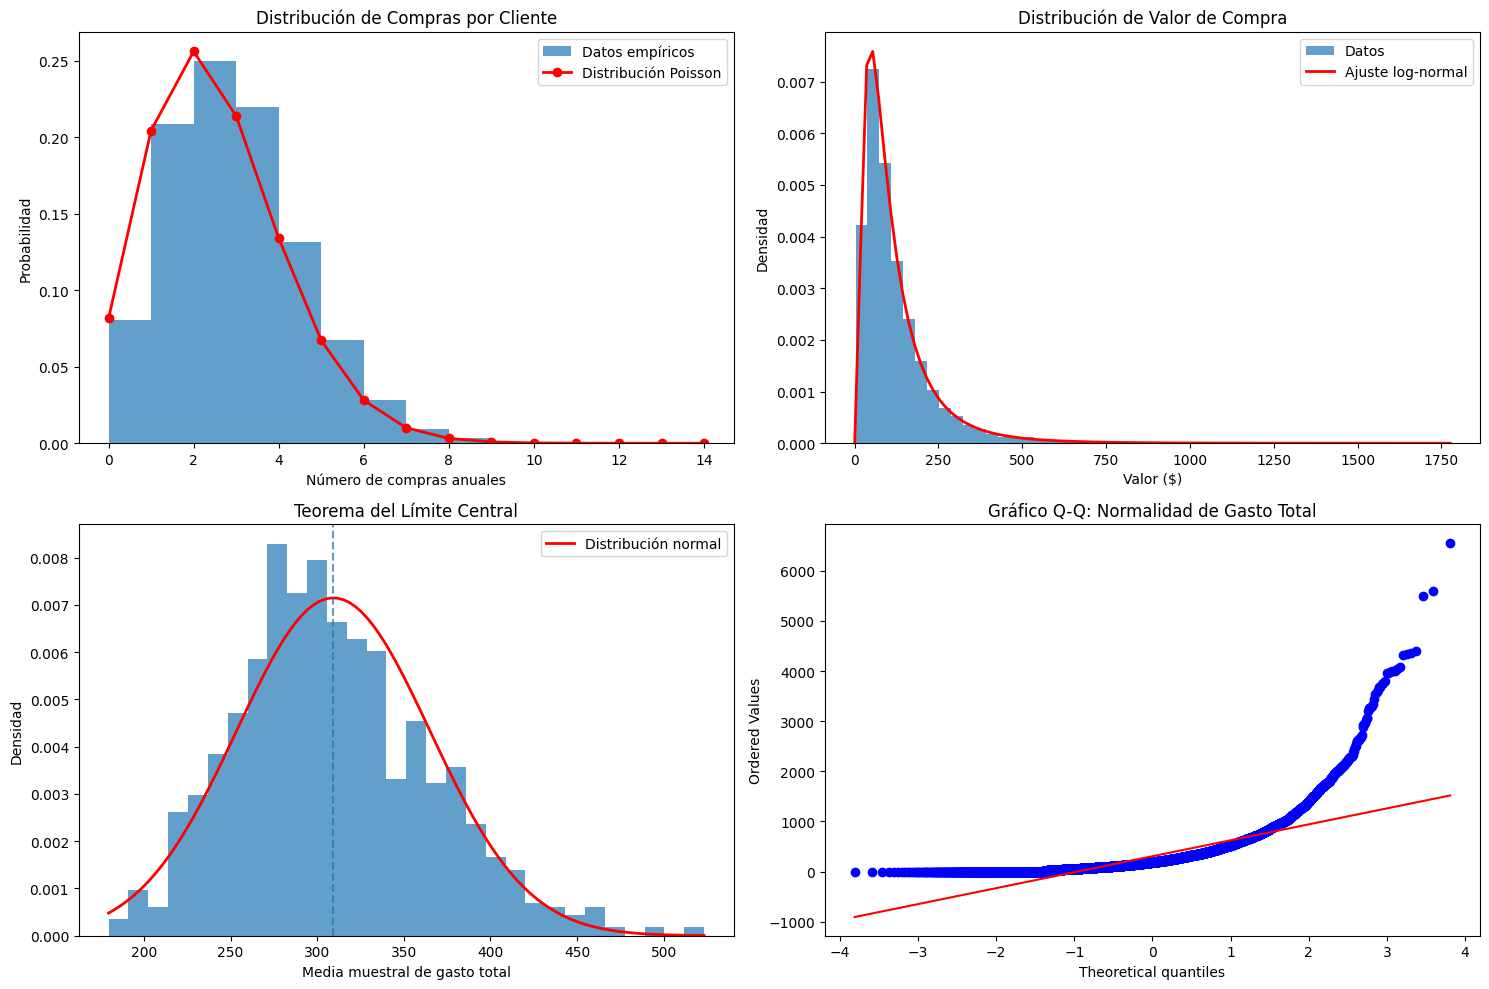

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ===============================
# GENERACIÓN DE DATOS SIMULADOS
# ===============================

np.random.seed(42)
n_clientes = 10000

# Simular compras por cliente (Poisson)
compras_por_cliente = np.random.poisson(lam=2.5, size=n_clientes)

# Simular valor de compra (Log-normal)
valor_compra = np.random.lognormal(mean=4.5, sigma=0.8, size=n_clientes)

# Crear DataFrame
df = pd.DataFrame({
    'cliente_id': range(1, n_clientes + 1),
    'compras_anuales': compras_por_cliente,
    'valor_promedio_compra': valor_compra,
    'gasto_total_anual': compras_por_cliente * valor_compra
})

print("Análisis probabilístico de comportamiento de clientes")
print("=" * 55)
print(f"Total clientes analizados: {len(df):,}")
print(f"Compras promedio por cliente/año: {df['compras_anuales'].mean():.2f}")
print(f"Valor promedio de compra: ${df['valor_promedio_compra'].mean():.2f}")

# ===============================
# ANÁLISIS DE DISTRIBUCIONES
# ===============================

print("\nDISTRIBUCIÓN DE COMPRAS ANUALES")
print("-" * 35)
print(df['compras_anuales'].value_counts().sort_index().head(10))

lambda_compras = df['compras_anuales'].mean()

print(f"\nProbabilidades (usando distribución de Poisson λ={lambda_compras:.2f}):")
print(f"P(0 compras/año): {stats.poisson.pmf(0, lambda_compras):.4f}")
print(f"P(1 compra/año): {stats.poisson.pmf(1, lambda_compras):.4f}")
print(f"P(5+ compras/año): {1 - stats.poisson.cdf(4, lambda_compras):.4f}")

print(f"\nANÁLISIS DE VALOR DE COMPRA")
print("-" * 30)
print(f"Media: ${df['valor_promedio_compra'].mean():.2f}")
print(f"Mediana: ${df['valor_promedio_compra'].median():.2f}")
print(f"Desviación estándar: ${df['valor_promedio_compra'].std():.2f}")

_, p_valor = stats.normaltest(df['valor_promedio_compra'])
print(f"Test de normalidad (p-valor): {p_valor:.4f}")
print(f"¿Es normal?: {'No' if p_valor < 0.05 else 'Sí'}")

# ===============================
# TEOREMA DEL LÍMITE CENTRAL
# ===============================

n_muestras = 1000
tamano_muestra = 50

medias_muestrales = []
for _ in range(n_muestras):
    muestra = np.random.choice(df['gasto_total_anual'], size=tamano_muestra, replace=True)
    medias_muestrales.append(np.mean(muestra))

medias_array = np.array(medias_muestrales)
media_muestral_global = np.mean(medias_array)
error_estandar = np.std(medias_array)

print(f"\nTEOREMA DEL LÍMITE CENTRAL")
print("-" * 30)
print(f"Media de medias muestrales: ${media_muestral_global:.2f}")
print(f"Media poblacional real: ${df['gasto_total_anual'].mean():.2f}")
print(f"Error estándar de medias: ${error_estandar:.2f}")

z_score = 1.96
margen_error = z_score * error_estandar
ic_inferior = media_muestral_global - margen_error
ic_superior = media_muestral_global + margen_error

print(f"Intervalo de confianza 95%: (${ic_inferior:.2f}, ${ic_superior:.2f})")
print(f"Margen de error: ${margen_error:.2f}")

# ===============================
# VISUALIZACIONES
# ===============================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.hist(df['compras_anuales'], bins=range(0, 15), alpha=0.7, density=True, label='Datos empíricos')
x_poisson = range(0, 15)
y_poisson = [stats.poisson.pmf(x, lambda_compras) for x in x_poisson]
ax1.plot(x_poisson, y_poisson, 'ro-', linewidth=2, label='Distribución Poisson')
ax1.set_title('Distribución de Compras por Cliente')
ax1.set_xlabel('Número de compras anuales')
ax1.set_ylabel('Probabilidad')
ax1.legend()

ax2.hist(df['valor_promedio_compra'], bins=50, alpha=0.7, density=True, label='Datos')
params = stats.lognorm.fit(df['valor_promedio_compra'])
x_fit = np.linspace(0, df['valor_promedio_compra'].max(), 100)
y_fit = stats.lognorm.pdf(x_fit, *params)
ax2.plot(x_fit, y_fit, 'r-', linewidth=2, label='Ajuste log-normal')
ax2.set_title('Distribución de Valor de Compra')
ax2.set_xlabel('Valor ($)')
ax2.set_ylabel('Densidad')
ax2.legend()

ax3.hist(medias_array, bins=30, alpha=0.7, density=True)
x_normal = np.linspace(medias_array.min(), medias_array.max(), 100)
y_normal = stats.norm.pdf(x_normal, media_muestral_global, error_estandar)
ax3.plot(x_normal, y_normal, 'r-', linewidth=2, label='Distribución normal')
ax3.axvline(media_muestral_global, linestyle='--', alpha=0.7)
ax3.set_title('Teorema del Límite Central')
ax3.set_xlabel('Media muestral de gasto total')
ax3.set_ylabel('Densidad')
ax3.legend()

stats.probplot(df['gasto_total_anual'], dist="norm", plot=ax4)
ax4.set_title('Gráfico Q-Q: Normalidad de Gasto Total')

plt.tight_layout()
plt.savefig('distribuciones_probabilidad_clientes.png', dpi=300, bbox_inches='tight')
print("\nVisualizaciones guardadas como 'distribuciones_probabilidad_clientes.png'")
plt.show()

In [2]:
# ===============================
# EXPORTACIÓN A EXCEL PARA REPRODUCIBILIDAD
# ===============================

# 1. TABLA PRINCIPAL (DATASET COMPLETO)
dataset_completo = df.copy()

# 2. TABLA DE ESTADÍSTICOS GENERALES
estadisticos_generales = pd.DataFrame({
    'Métrica': [
        'Total clientes',
        'Compras promedio por cliente',
        'Valor promedio de compra',
        'Mediana valor de compra',
        'Desviación estándar valor de compra',
        'Gasto total promedio anual'
    ],
    'Valor': [
        len(df),
        df['compras_anuales'].mean(),
        df['valor_promedio_compra'].mean(),
        df['valor_promedio_compra'].median(),
        df['valor_promedio_compra'].std(),
        df['gasto_total_anual'].mean()
    ]
})

# 3. DISTRIBUCIÓN DE COMPRAS (EMPÍRICA)
tabla_distribucion_compras = (
    df['compras_anuales']
    .value_counts()
    .sort_index()
    .reset_index()
)
tabla_distribucion_compras.columns = ['Compras_anuales', 'Frecuencia_clientes']

tabla_distribucion_compras['Probabilidad_empirica'] = (
    tabla_distribucion_compras['Frecuencia_clientes'] / len(df)
)

# 4. PROBABILIDADES TEÓRICAS (POISSON)
tabla_poisson = pd.DataFrame({
    'Compras_anuales': range(0, 15)
})

tabla_poisson['Probabilidad_Poisson'] = tabla_poisson['Compras_anuales'].apply(
    lambda x: stats.poisson.pmf(x, lambda_compras)
)

# 5. ANÁLISIS DE NORMALIDAD (VALOR DE COMPRA)
normalidad_valor_compra = pd.DataFrame({
    'Test': ['D’Agostino-Pearson'],
    'p_valor': [p_valor],
    'Es_normal': ['No' if p_valor < 0.05 else 'Sí']
})

# 6. RESULTADOS DEL TEOREMA DEL LÍMITE CENTRAL
resultados_tlc = pd.DataFrame({
    'Métrica': [
        'Media poblacional gasto total',
        'Media de medias muestrales',
        'Error estándar',
        'Margen de error (95%)',
        'IC 95% inferior',
        'IC 95% superior'
    ],
    'Valor': [
        df['gasto_total_anual'].mean(),
        media_muestral_global,
        error_estandar,
        margen_error,
        ic_inferior,
        ic_superior
    ]
})

# 7. MEDIAS MUESTRALES (PARA AUDITORÍA DEL TLC)
medias_muestrales_df = pd.DataFrame({
    'Media_muestral_gasto_total': medias_array
})

# 8. EXPORTAR TODO A EXCEL
nombre_archivo = 'analisis_probabilistico_clientes_reproducible.xlsx'

with pd.ExcelWriter(nombre_archivo, engine='openpyxl') as writer:
    dataset_completo.to_excel(writer, sheet_name='Dataset_Completo', index=False)
    estadisticos_generales.to_excel(writer, sheet_name='Estadisticos_Generales', index=False)
    tabla_distribucion_compras.to_excel(writer, sheet_name='Distribucion_Compras', index=False)
    tabla_poisson.to_excel(writer, sheet_name='Probabilidades_Poisson', index=False)
    normalidad_valor_compra.to_excel(writer, sheet_name='Normalidad_Valor_Compra', index=False)
    resultados_tlc.to_excel(writer, sheet_name='Resultados_TLC', index=False)
    medias_muestrales_df.to_excel(writer, sheet_name='Medias_Muestrales_TLC', index=False)

print(f"Archivo Excel generado correctamente: {nombre_archivo}")

Archivo Excel generado correctamente: analisis_probabilistico_clientes_reproducible.xlsx


TESTS DE NORMALIDAD (DATOS CRUDOS)
Compras anuales: p-valor = 1.22574e-139 → ¿Normal?: No
Valor promedio de compra: p-valor = 0.00000e+00 → ¿Normal?: No
Gasto total anual: p-valor = 0.00000e+00 → ¿Normal?: No


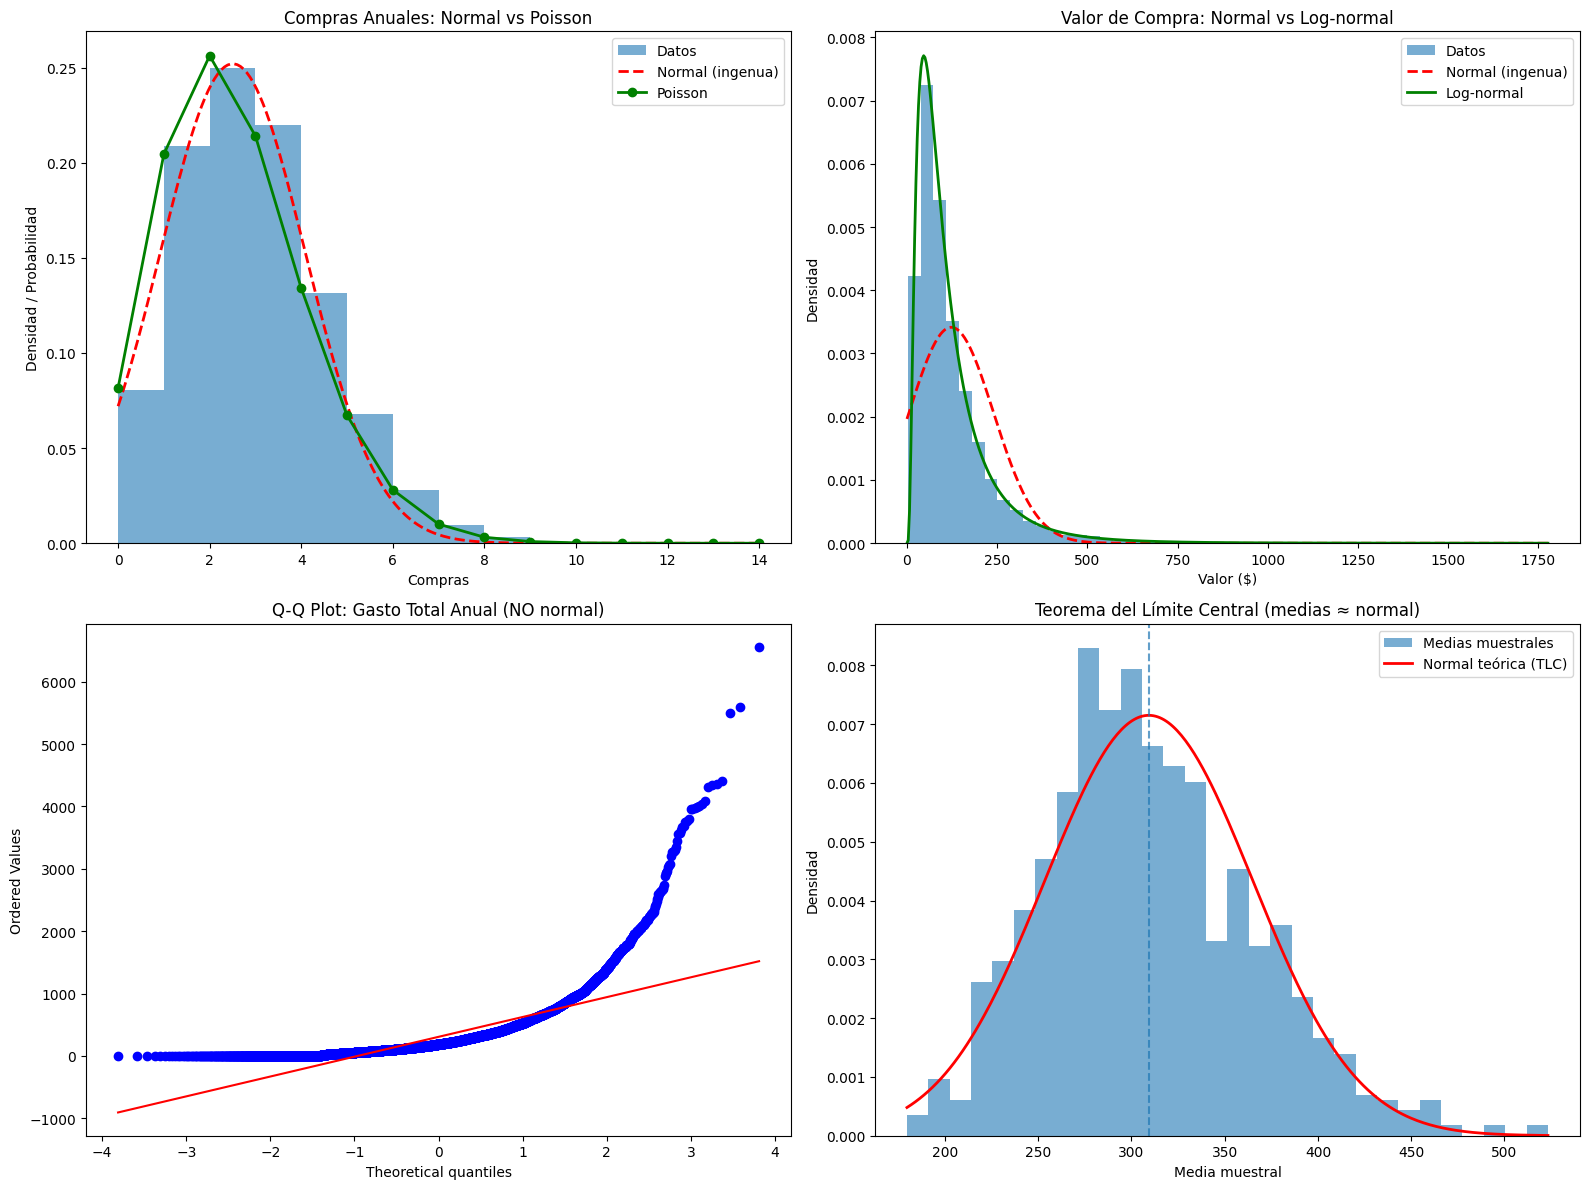


Comparación completada.
Gráfico guardado como: comparacion_modelos_normal_vs_reales.png


In [3]:
# ============================================================
# COMPARACIÓN DE MODELOS: NORMAL vs DISTRIBUCIONES ADECUADAS
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------------
# 1. TESTS DE NORMALIDAD
# -------------------------------

print("TESTS DE NORMALIDAD (DATOS CRUDOS)")
print("=" * 45)

variables = {
    'Compras anuales': df['compras_anuales'],
    'Valor promedio de compra': df['valor_promedio_compra'],
    'Gasto total anual': df['gasto_total_anual']
}

normalidad_resultados = []

for nombre, serie in variables.items():
    stat, p = stats.normaltest(serie)
    normalidad_resultados.append([nombre, p, 'No' if p < 0.05 else 'Sí'])
    print(f"{nombre}: p-valor = {p:.5e} → ¿Normal?: {'No' if p < 0.05 else 'Sí'}")

normalidad_df = pd.DataFrame(
    normalidad_resultados,
    columns=['Variable', 'p_valor', 'Es_normal']
)

# -------------------------------
# 2. AJUSTE NORMAL (MODELO INGENUO)
# -------------------------------

ajuste_normal = {}

for nombre, serie in variables.items():
    mu, sigma = stats.norm.fit(serie)
    ajuste_normal[nombre] = (mu, sigma)

# -------------------------------
# 3. AJUSTE DE MODELOS CORRECTOS
# -------------------------------

# Poisson para compras
lambda_poisson = df['compras_anuales'].mean()

# Log-normal para valor de compra
params_lognorm = stats.lognorm.fit(df['valor_promedio_compra'])

# -------------------------------
# 4. VISUALIZACIÓN COMPARATIVA
# -------------------------------

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ---- Compras: Normal vs Poisson ----
ax = axes[0, 0]
ax.hist(df['compras_anuales'], bins=range(0, 15), density=True, alpha=0.6, label='Datos')

x = np.linspace(0, 14, 200)
mu, sigma = ajuste_normal['Compras anuales']
ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r--', linewidth=2, label='Normal (ingenua)')

x_p = range(0, 15)
ax.plot(x_p, stats.poisson.pmf(x_p, lambda_poisson), 'go-', linewidth=2, label='Poisson')

ax.set_title('Compras Anuales: Normal vs Poisson')
ax.set_xlabel('Compras')
ax.set_ylabel('Densidad / Probabilidad')
ax.legend()

# ---- Valor compra: Normal vs Log-normal ----
ax = axes[0, 1]
ax.hist(df['valor_promedio_compra'], bins=50, density=True, alpha=0.6, label='Datos')

x = np.linspace(0, df['valor_promedio_compra'].max(), 500)
mu, sigma = ajuste_normal['Valor promedio de compra']
ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r--', linewidth=2, label='Normal (ingenua)')

ax.plot(x, stats.lognorm.pdf(x, *params_lognorm), 'g-', linewidth=2, label='Log-normal')

ax.set_title('Valor de Compra: Normal vs Log-normal')
ax.set_xlabel('Valor ($)')
ax.set_ylabel('Densidad')
ax.legend()

# ---- Q-Q plot gasto total ----
ax = axes[1, 0]
stats.probplot(df['gasto_total_anual'], dist="norm", plot=ax)
ax.set_title('Q-Q Plot: Gasto Total Anual (NO normal)')

# ---- TLC: Medias muestrales ----
ax = axes[1, 1]
ax.hist(medias_array, bins=30, density=True, alpha=0.6, label='Medias muestrales')

x = np.linspace(medias_array.min(), medias_array.max(), 300)
ax.plot(x, stats.norm.pdf(x, media_muestral_global, error_estandar),
        'r-', linewidth=2, label='Normal teórica (TLC)')

ax.axvline(media_muestral_global, linestyle='--', alpha=0.7)
ax.set_title('Teorema del Límite Central (medias ≈ normal)')
ax.set_xlabel('Media muestral')
ax.set_ylabel('Densidad')
ax.legend()

plt.tight_layout()
plt.savefig('comparacion_modelos_normal_vs_reales.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nComparación completada.")
print("Gráfico guardado como: comparacion_modelos_normal_vs_reales.png")